In [22]:
using TaylorSeries, IntervalArithmetic, Plots, LaTeXStrings

In [23]:
G(x) = 4*x+0.01*sin(8*pi*x)

G (generic function with 1 method)

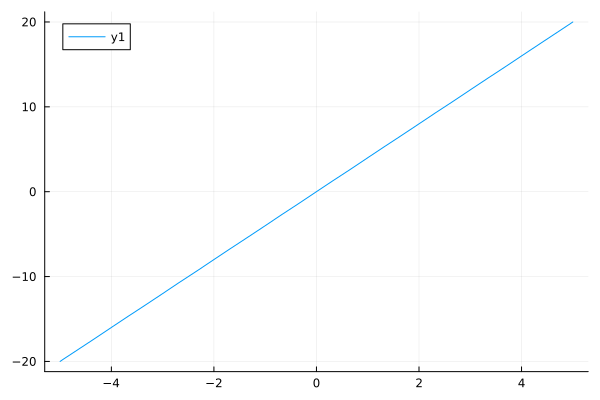

In [24]:
plot(G)

#### First we have seach the enclosure for $\frac{1}{|T'(x)|}$.

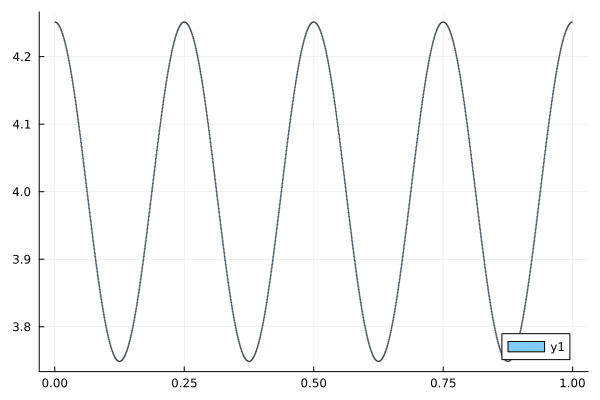

In [25]:
I = @interval 0 1
In = [I.lo + ((interval(i, i+1))/1024)*(I.hi-I.lo) for i in 0:1023]
Ct = [G(Taylor1([x, 1], 100))[1] for x in In]
rect = In .× Ct 
plot(rect)

In [26]:
c1 = abs(1/(hull(Ct)))

[0.23522, 0.266762]

#### Now we have the search the enclosure for $\frac{T''}{(T')^2}.$

In [27]:
TM100 = Taylor1([I, 1], 100)

 [0, 1] + [1, 1] t + 𝒪(t¹⁰¹)

In [28]:
distortion1(x) = 1/(TaylorSeries.derivative(G(TM100)))

distortion1 (generic function with 1 method)

In [29]:
Ct2 = [distortion1(x)[1] for x in In]

1024-element Vector{Interval{Float64}}:
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
   ⋮
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]
 [-0.449495, 0.449495]

In [30]:
c2 = abs((hull(Ct2)))

[0, 0.449495]